In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
data = boston.data
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)

In [8]:
price = boston.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [12]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

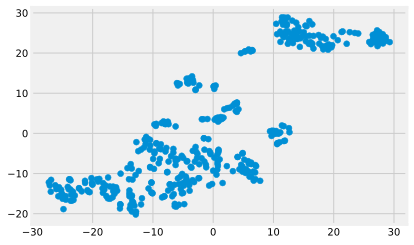

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [14]:
# 2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [15]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [16]:
labels_test = kmeans.predict(X_test_scaled)

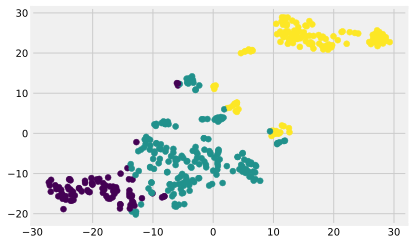

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

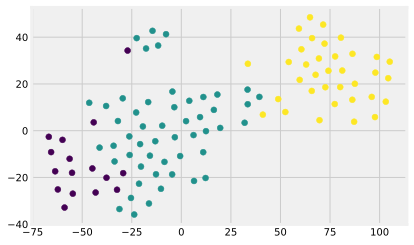

In [19]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [20]:
y_train.mean()

22.796534653465343

In [21]:
y_train[labels_train==0].mean()

27.87411764705882

In [22]:
y_train[labels_train==1].mean()

24.971204188481675

In [23]:
y_train[labels_train==2].mean()

16.1796875

Text(0.5, 0, 'Цена')

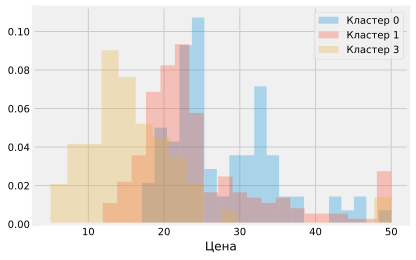

In [24]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.3)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.3)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.3)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 3'])
plt.xlabel('Цена')

In [25]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.0721184705882353

In [26]:
X_train.loc[labels_train==1, 'CRIM'].mean()

0.42098554973821994

In [27]:
X_train.loc[labels_train==2, 'CRIM'].mean()

10.7152190625

In [29]:
# 3
y_test[labels_test==0].mean()

31.35

In [30]:
y_test[labels_test==1].mean()

21.860784313725492

In [31]:
y_test[labels_test==2].mean()

16.43714285714286

In [32]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.06206

In [33]:
X_test.loc[labels_test==1, 'CRIM'].mean()

0.2660788235294118

In [34]:
X_test.loc[labels_test==2, 'CRIM'].mean()

10.165531142857143

Text(0.5, 0, 'Цена')

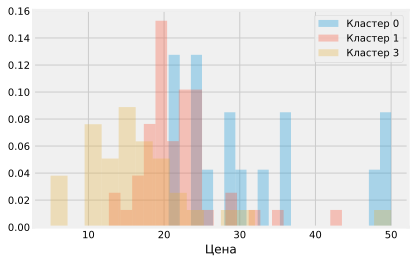

In [35]:
plt.hist(y_test[labels_test==0], bins = 20, density = True, alpha=0.3)
plt.hist(y_test[labels_test==1], bins = 20, density = True, alpha=0.3)
plt.hist(y_test[labels_test==2], bins = 20, density = True, alpha=0.3)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 3'])
plt.xlabel('Цена')